In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
tuberculosis = pd.read_csv("C:\\Users\\user\\Desktop\\dataset\\incedenceOfTuberculosis.csv")

In [3]:
tuberculosis.head()

,Location,Indicator,Period,First Tooltip
0,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2019,189 [122-270]
1,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2018,189 [122-270]
2,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2017,189 [122-270]
3,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2016,189 [122-270]
4,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2015,189 [122-270]


In [4]:
allCountries = tuberculosis['Location'].unique().tolist()
print(len(allCountries))

195


In [5]:
tuberculosis['Lower'] = tuberculosis['First Tooltip'].apply(lambda s:float(s.split(" ")[1][1:-1].split("-")[0]))
tuberculosis['Upper'] = tuberculosis['First Tooltip'].apply(lambda s:float(s.split(" ")[1][1:-1].split("-")[1]))
tuberculosis['First Tooltip'] = tuberculosis['First Tooltip'].apply(lambda s:float(s.split(" ")[0]))

In [6]:
tuberculosis.head()

,Location,Indicator,Period,First Tooltip,Lower,Upper
0,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2019,189.0,122.0,270.0
1,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2018,189.0,122.0,270.0
2,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2017,189.0,122.0,270.0
3,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2016,189.0,122.0,270.0
4,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2015,189.0,122.0,270.0


In [7]:
def compareCountries(countries):
    fig = plt.figure(figsize = (10,10))
    ax1 = plt.subplot2grid((1,1),(0,0))

    for country in countries:
        if country not in allCountries:
            print(f"Country {country} DO NOT EXIST ")
            return
        tempData = tuberculosis[tuberculosis['Location'] == country]
        tempData['Period'] = pd.to_datetime(tempData['Period'], format = '%Y')
        ax1.plot(tempData['Period'], tempData['First Tooltip'], label=country)
    for tick in ax1.get_xticklabels():
        tick.set_rotation(45)
    plt.grid()
    plt.legend()
    plt.xlabel("Year")
    plt.ylabel("Tuberculosis incidence")
    plt.title("Tuberculosis incidence (per 100,000 population at risk)")
    plt.show()

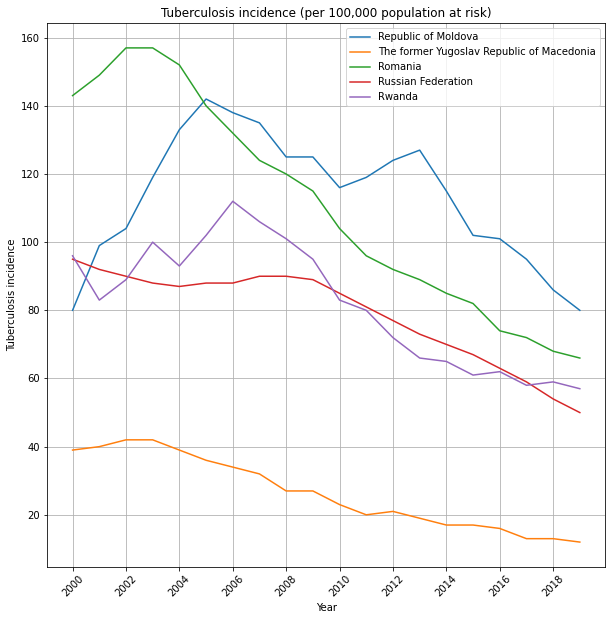

In [8]:
import random
i=random.randint(0,len(allCountries)-5)
countries=allCountries[i:i+5]
compareCountries(countries)
    

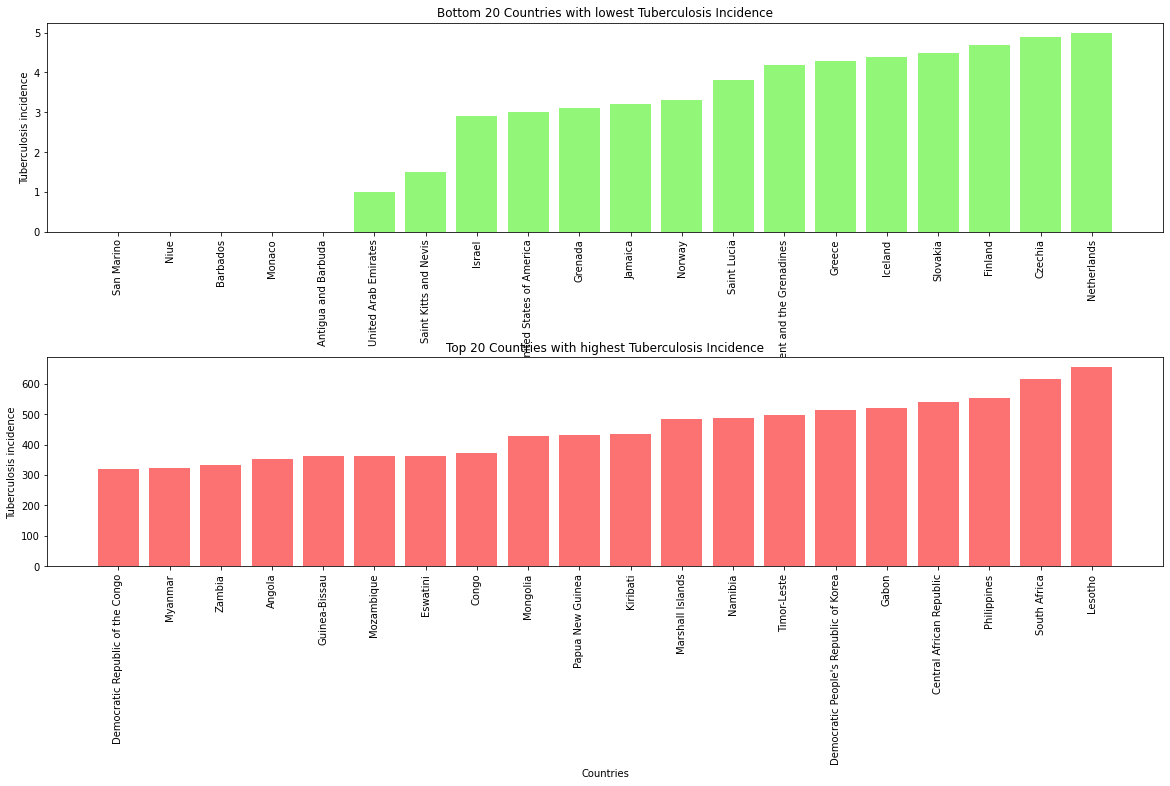

In [9]:
tempData = tuberculosis[tuberculosis['Period'] == 2019]
tempData.sort_values('First Tooltip', inplace=True)
tempDataBot = tempData[-20:]
tempDataTop = tempData[:20]
fig = plt.figure(figsize=(20,10))

ax1 = plt.subplot2grid((2,1),(0,0))
rects1 = ax1.bar(tempDataTop['Location'], tempDataTop['First Tooltip'], color = "#92f779")
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax1.set_ylabel("Tuberculosis incidence")
ax1.set_title("Bottom 20 Countries with lowest Tuberculosis Incidence")
    
ax2 = plt.subplot2grid((2,1),(1,0))
rects2 = ax2.bar(tempDataBot['Location'], tempDataBot['First Tooltip'], color = "#fc7272")
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)

ax2.set_xlabel("Countries")
ax2.set_ylabel("Tuberculosis incidence")
ax2.set_title("Top 20 Countries with highest Tuberculosis Incidence")
plt.subplots_adjust(hspace = 0.6)
plt.show()

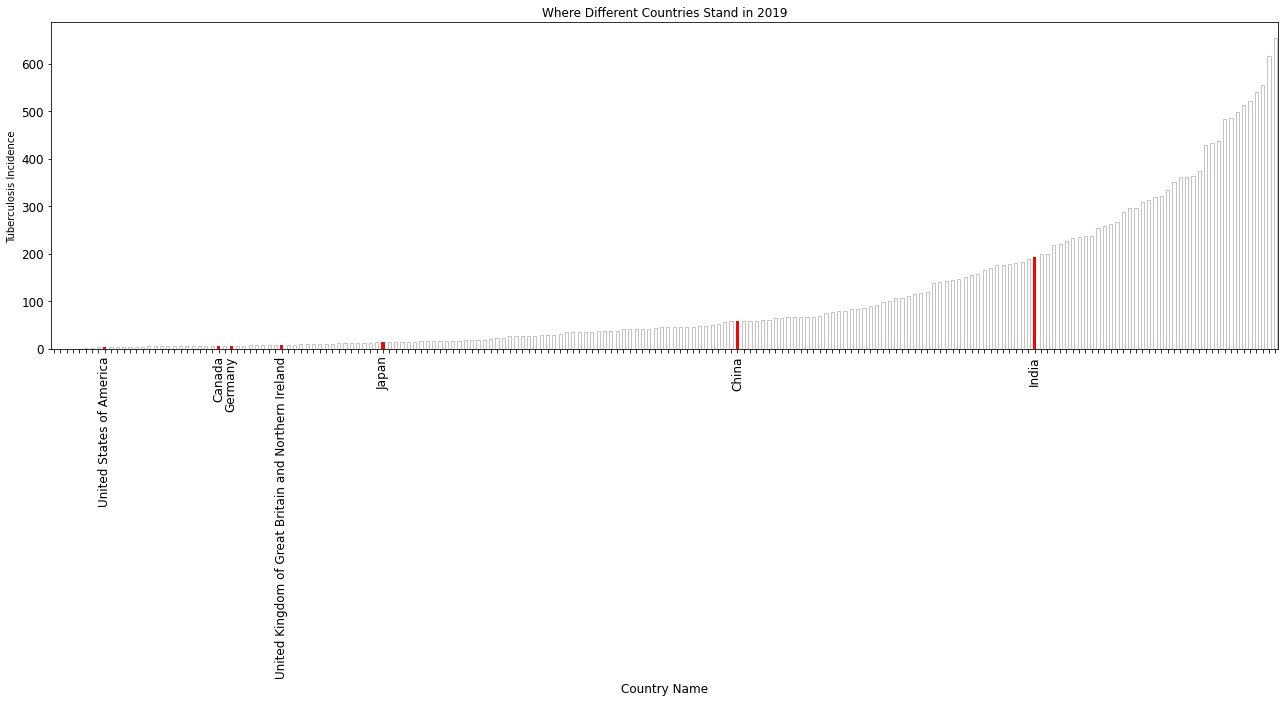

In [10]:
tempData = tuberculosis[tuberculosis['Period'] == 2019]
tempData.sort_values('First Tooltip', inplace=True)
tempData.reset_index(inplace=True)
tempData.set_index('Location',drop=True,inplace=True)
countries=['India', 'China', 'United States of America', 'Germany',
           'United Kingdom of Great Britain and Northern Ireland', 
           'Japan', 'Canada']


ax_1 = tempData['First Tooltip'].plot(kind='bar', title ="graph", figsize=(22, 6), fontsize=12)
ax_1.set_xlabel("Country Name", fontsize=12)
ax_1.set_title("Where Different Countries Stand in 2019")
ax_1.set_ylabel("Tuberculosis Incidence")
for ticks in ax_1.xaxis.get_major_ticks():
    if ticks.label1.get_text() not in countries:
        ticks.label1.set_visible(False)
        ax_1.patches[tempData.index.get_indexer([ticks.label1.get_text()])[0]].set_facecolor('w')
        ax_1.patches[tempData.index.get_indexer([ticks.label1.get_text()])[0]].set_edgecolor('#c7c3c3')
    else:
        ax_1.patches[tempData.index.get_indexer([ticks.label1.get_text()])[0]].set_facecolor('r')
        

Plot For TOP 5 Countries


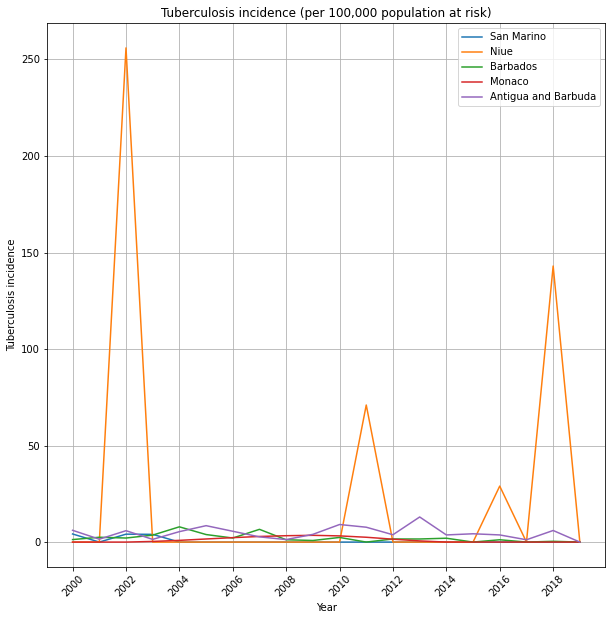

Plot For BOTTOM 5 Countries


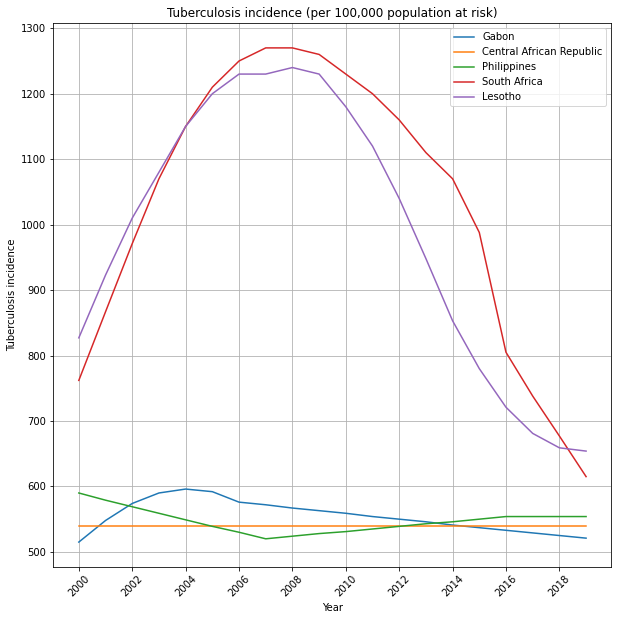

In [11]:
tempData = tuberculosis[tuberculosis['Period'] == 2019]
tempData.sort_values('First Tooltip', inplace=True)
top5countries = tempData[:5].Location.values.tolist()
bot5countries = tempData[-5:].Location.values.tolist()
print("Plot For TOP 5 Countries")
compareCountries(top5countries)
print("Plot For BOTTOM 5 Countries")
compareCountries(bot5countries)


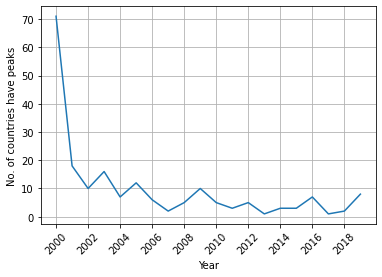

In [12]:
tempData = tuberculosis.sort_values('First Tooltip', ascending=False).groupby("Location").first()
tempData = tempData.groupby("Period")['First Tooltip'].count()
tempData = tempData.reset_index()
tempData['Period'] = pd.to_datetime(tempData['Period'], format = '%Y')
fig = plt.figure()
ax = plt.subplot2grid((1,1),(0,0))
ax.plot(tempData['Period'], tempData['First Tooltip'])
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.xlabel("Year")
plt.ylabel("No. of countries have peaks")
plt.title("")
plt.grid()

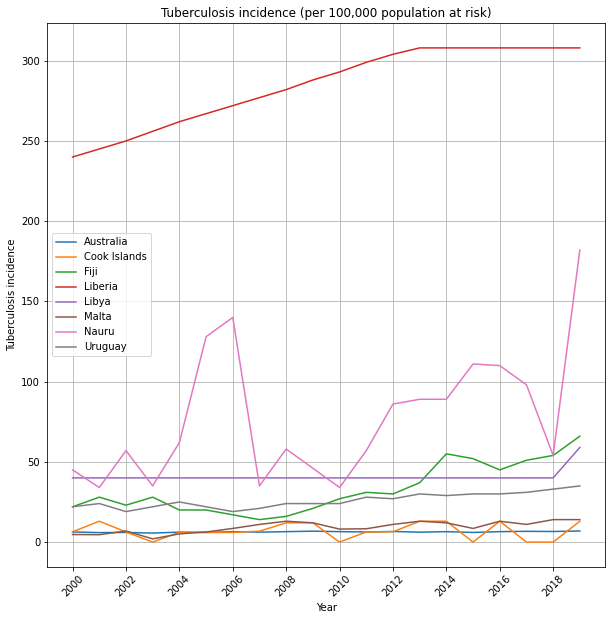

In [13]:
tempData = tuberculosis.sort_values('First Tooltip', ascending=False).groupby("Location").first().reset_index()
countriesPeak2019 = tempData[tempData['Period'] == 2019].Location.values.tolist()
compareCountries(countriesPeak2019)

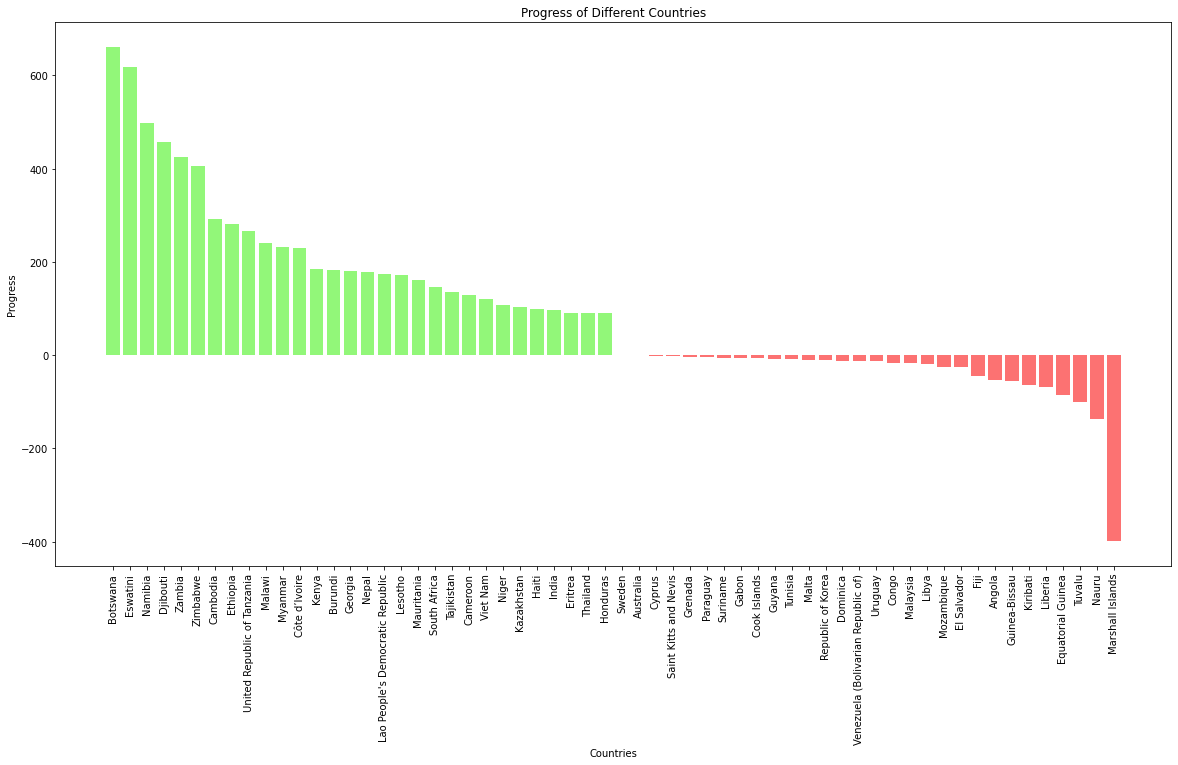

In [15]:
tempData2019 = tuberculosis[tuberculosis['Period'] == 2019]
tempData2000 = tuberculosis[tuberculosis['Period'] == 2000]

tempData2019.set_index("Location", inplace=True)
tempData2000.set_index("Location", inplace=True)

tempData = tempData2019.join(tempData2000, lsuffix='_19', rsuffix='_00')
tempData['progress'] = tempData['First Tooltip_00'] - tempData['First Tooltip_19']
tempData.dropna(inplace=True)
tempData.reset_index(inplace=True)
tempData = tempData[['Location', 'progress']].sort_values('progress', ascending=False)
tempDataTop = tempData[:30]
tempDataBot = tempData[-30:]

fig = plt.figure(figsize=(20,10))

ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
rects1 = ax1.bar(tempDataTop['Location'], tempDataTop['progress'], color = '#92f779')
rects1 = ax1.bar(tempDataBot['Location'], tempDataBot['progress'], color = '#fc7272')
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)

plt.xlabel("Countries")
plt.ylabel("Progress")
plt.title("Progress of Different Countries")
plt.show()

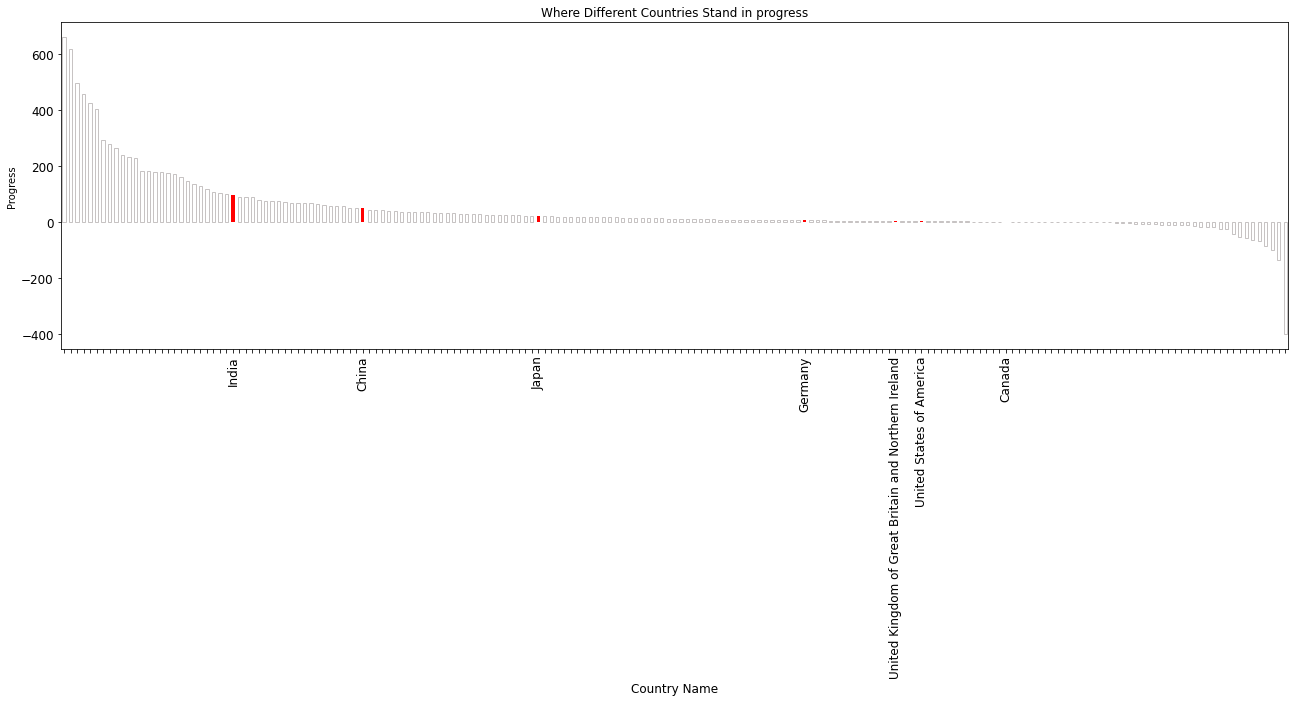

In [17]:
tempData2019 = tuberculosis[tuberculosis['Period'] == 2019]
tempData2000 = tuberculosis[tuberculosis['Period'] == 2000]

tempData2019.set_index("Location", inplace=True)
tempData2000.set_index("Location", inplace=True)

tempData = tempData2019.join(tempData2000, lsuffix='_19', rsuffix='_00')
tempData['progress'] = tempData['First Tooltip_00'] - tempData['First Tooltip_19']
tempData.dropna(inplace=True)
tempData.reset_index(inplace=True)
tempData = tempData[['Location', 'progress']].sort_values('progress', ascending=False)
tempData.set_index("Location", inplace=True)

countries=['India', 'China', 'United States of America', 'Germany',
           'United Kingdom of Great Britain and Northern Ireland', 
           'Japan', 'Canada']


ax_1 = tempData['progress'].plot(kind='bar', title ="graph", figsize=(22, 6), fontsize=12)
ax_1.set_xlabel("Country Name", fontsize=12)
ax_1.set_title("Where Different Countries Stand in progress")
ax_1.set_ylabel("Progress")
for ticks in ax_1.xaxis.get_major_ticks():
    if ticks.label1.get_text() not in countries:
        ticks.label1.set_visible(False)
        ax_1.patches[tempData.index.get_indexer([ticks.label1.get_text()])[0]].set_facecolor('w')
        ax_1.patches[tempData.index.get_indexer([ticks.label1.get_text()])[0]].set_edgecolor('#c7c3c3')
    else:
        ax_1.patches[tempData.index.get_indexer([ticks.label1.get_text()])[0]].set_facecolor('r')
        

Top 2 countries with highest positive growth and Bottom two countries with highest negative growth


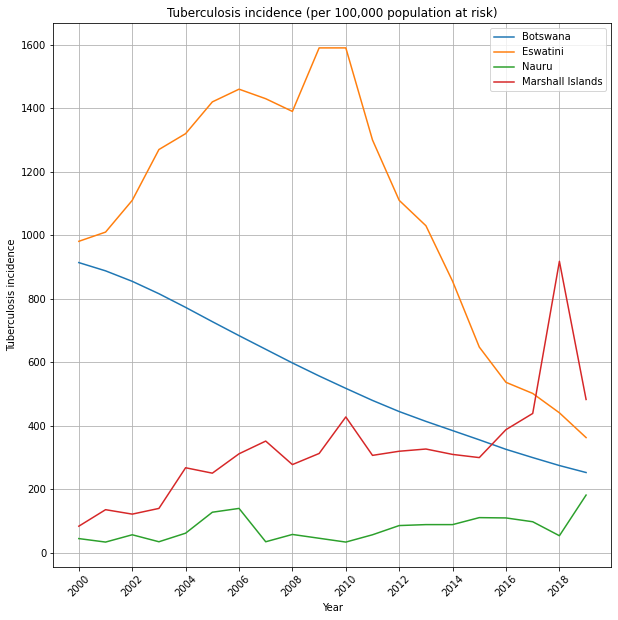

In [20]:
print('Top 2 countries with highest positive growth and Bottom two countries with highest negative growth')
countries = ['Botswana', 'Eswatini', 'Nauru', 'Marshall Islands']
compareCountries(countries)